# Harjeet Singh
# 18125760026

In [99]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [100]:
clu_invest=pd.read_csv('D:/MANIPAL/TERM 3/BANKING ANALYTICS/ASSIGNMENT/1/Clustering investment bank.csv')
clu_invest.head()

,Industry Name,Number of firms,EV/EBITDAR&D,EV/EBITDA,EV/EBIT,EV/EBIT (1-t)
0,Advertising,3,19.620690,19.620690,38.457757,104.370728
1,Aerospace/Defense,4,19.752130,19.772322,22.528760,30.205643
2,Air Transport,6,6.141390,6.141390,11.394131,12.997837
3,Apparel,314,9.629156,9.699331,18.450467,26.675986
4,Auto & Truck,12,7.930071,9.792722,13.290504,18.142346


In [101]:
clu_invest.isnull().sum()

Industry Name      0
Number of firms    0
EV/EBITDAR&D       0
EV/EBITDA          0
EV/EBIT            0
EV/EBIT (1-t)      0
dtype: int64

In [102]:
o=pd.get_dummies(clu_invest)

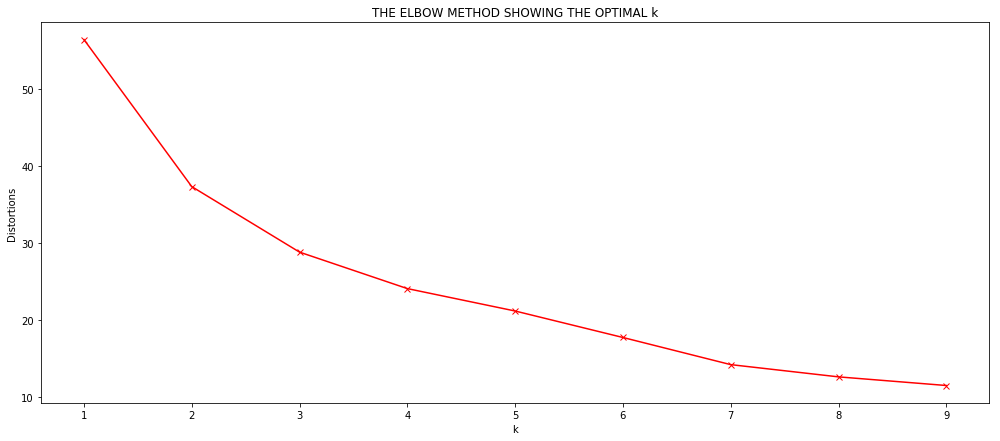

In [103]:
X=np.array(o)
#it means determine
distortions=[]
K=range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

fig=plt.figure(figsize=(17,7))
plt.plot(K,distortions,'bx-',color='red')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('THE ELBOW METHOD SHOWING THE OPTIMAL k')
plt.show()

# WITH 3 CLUSTERS

In [104]:
from sklearn.preprocessing import StandardScaler
X = clu_invest.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

In [105]:
df=o
kmeans=KMeans(n_clusters=3)#means data will go in 3 clusters
kmeans.fit(df)
centroids=kmeans.cluster_centers_

In [106]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [107]:
print('LABELS ARE : ', labels)

LABELS ARE :  [0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 2 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0]


In [108]:
print('CENTROIDS ARE : ',centroids)

CENTROIDS ARE :  [[ 1.34909091e+02  1.23407380e+01  1.29050326e+01  2.04784321e+01
   3.06265854e+01 -3.46944695e-18 -3.46944695e-18 -3.46944695e-18
   9.09090909e-02 -3.46944695e-18  9.09090909e-02 -3.46944695e-18
  -3.46944695e-18 -3.46944695e-18 -3.46944695e-18 -3.46944695e-18
  -3.46944695e-18  9.09090909e-02 -3.46944695e-18  9.09090909e-02
  -3.46944695e-18  9.09090909e-02  9.09090909e-02 -3.46944695e-18
  -3.46944695e-18  9.09090909e-02  9.09090909e-02 -3.46944695e-18
  -3.46944695e-18  9.09090909e-02 -3.46944695e-18 -3.46944695e-18
  -3.46944695e-18  9.09090909e-02 -3.46944695e-18 -3.46944695e-18
  -3.46944695e-18 -3.46944695e-18 -3.46944695e-18 -3.46944695e-18
  -3.46944695e-18 -3.46944695e-18 -3.46944695e-18 -3.46944695e-18
  -3.46944695e-18  9.09090909e-02 -3.46944695e-18 -3.46944695e-18
  -3.46944695e-18 -3.46944695e-18 -3.46944695e-18 -3.46944695e-18
  -3.46944695e-18]
 [ 1.94722222e+01  1.38658341e+01  1.42300605e+01  2.08698758e+01
   2.98339887e+01  2.77777778e-02  2.777

In [109]:
clu_invest['labels'] = k_means.labels_
clu_invest.head()

,Industry Name,Number of firms,EV/EBITDAR&D,EV/EBITDA,EV/EBIT,EV/EBIT (1-t),labels
0,Advertising,3,19.620690,19.620690,38.457757,104.370728,0
1,Aerospace/Defense,4,19.752130,19.772322,22.528760,30.205643,0
2,Air Transport,6,6.141390,6.141390,11.394131,12.997837,0
3,Apparel,314,9.629156,9.699331,18.450467,26.675986,1
4,Auto & Truck,12,7.930071,9.792722,13.290504,18.142346,0


In [110]:
clu_invest.groupby('labels').mean()

,Number of firms,EV/EBITDAR&D,EV/EBITDA,EV/EBIT,EV/EBIT (1-t)
labels,,,,,
0,19.472222,13.865834,14.230061,20.869876,29.833989
1,134.909091,12.340738,12.905033,20.478432,30.626585
2,187.000000,171.084942,171.085119,179.806054,0.000000


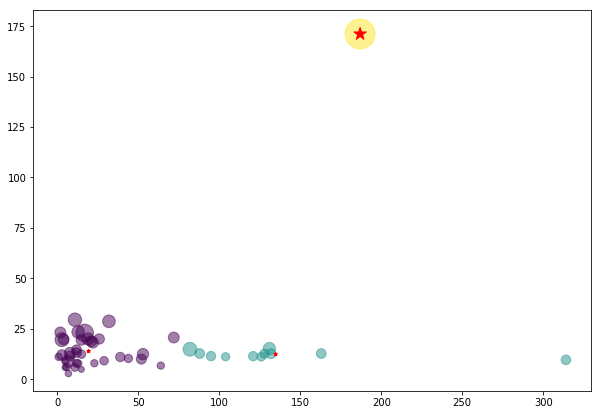

In [111]:
fig=plt.figure(figsize=(10,7))
plt.scatter(clu_invest['Number of firms'],clu_invest['EV/EBITDAR&D'],s=5*(clu_invest['EV/EBIT']),c=labels.astype(np.float),alpha=.5)
plt.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker='*',c='r',alpha=1)
plt.show()

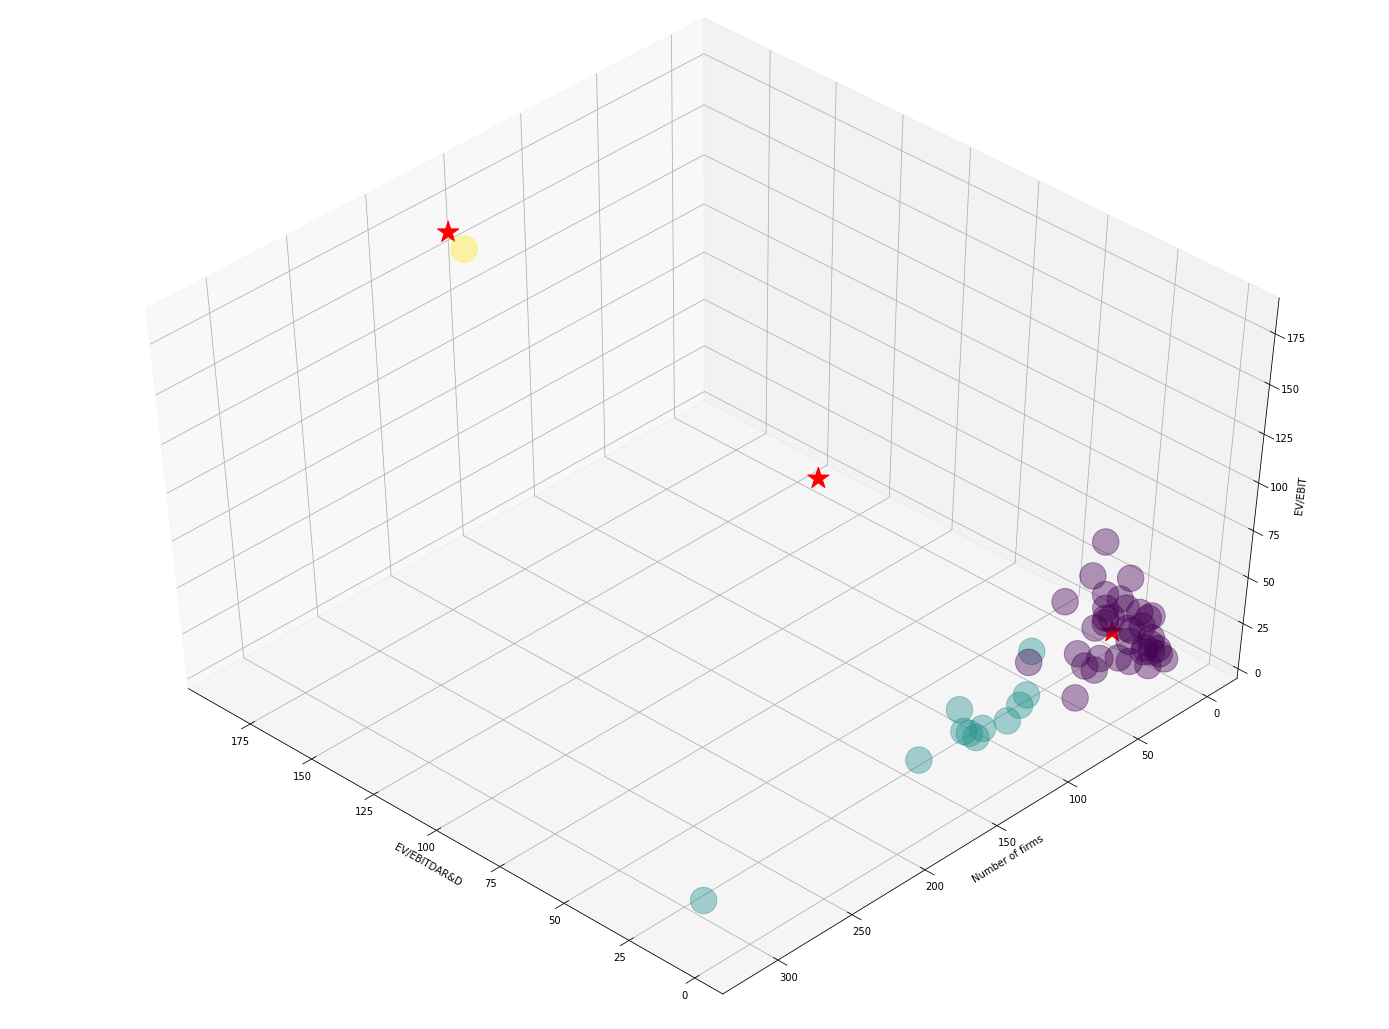

In [112]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(20, 14))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('EV/EBITDAR&D')
ax.set_ylabel('Number of firms')
ax.set_zlabel('EV/EBIT')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float),s=700,alpha=0.4)
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker='*',c='r',s=500,alpha=1)
plt.show()